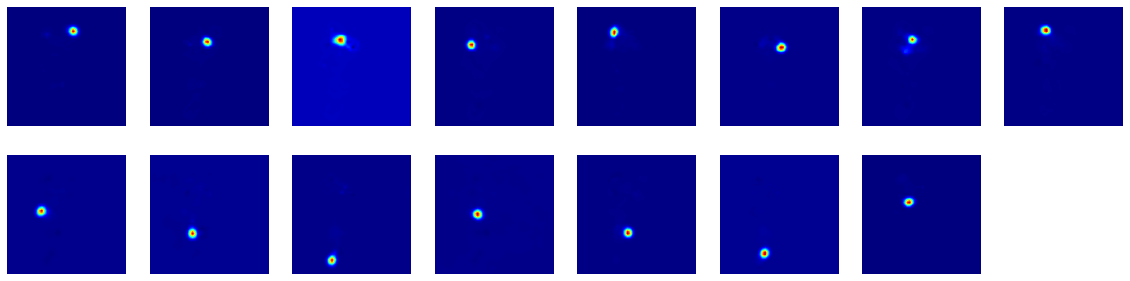

In [1]:
import cv2
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.animation import FuncAnimation
import urllib

weightsFile = 'pose_iter_160000.caffemodel'
protoFile = "pose_deploy_linevec_faster_4_stages.prototxt"

nPoints = 15
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

im = cv2.imread("Tiger_Woods_Crop.png")
im = im[:,:,::-1]
inWidth, inHeight = im.shape[0:2]

netInputSize = (368, 368)
inpBlob = cv2.dnn.blobFromImage(im, 1.0 / 255, netInputSize, (0, 0, 0), swapRB=True, crop=False)
net.setInput(inpBlob)

output = net.forward()

plt.figure(figsize=(20, 5))
for i in range(nPoints):
    proMap = output[0, i, :, :]
    displayMap = cv2.resize(proMap, (inWidth, inHeight), cv2.INTER_LINEAR)
    plt.subplot(2, 8, i + 1); plt.axis('off'); plt.imshow(displayMap, cmap='jet')

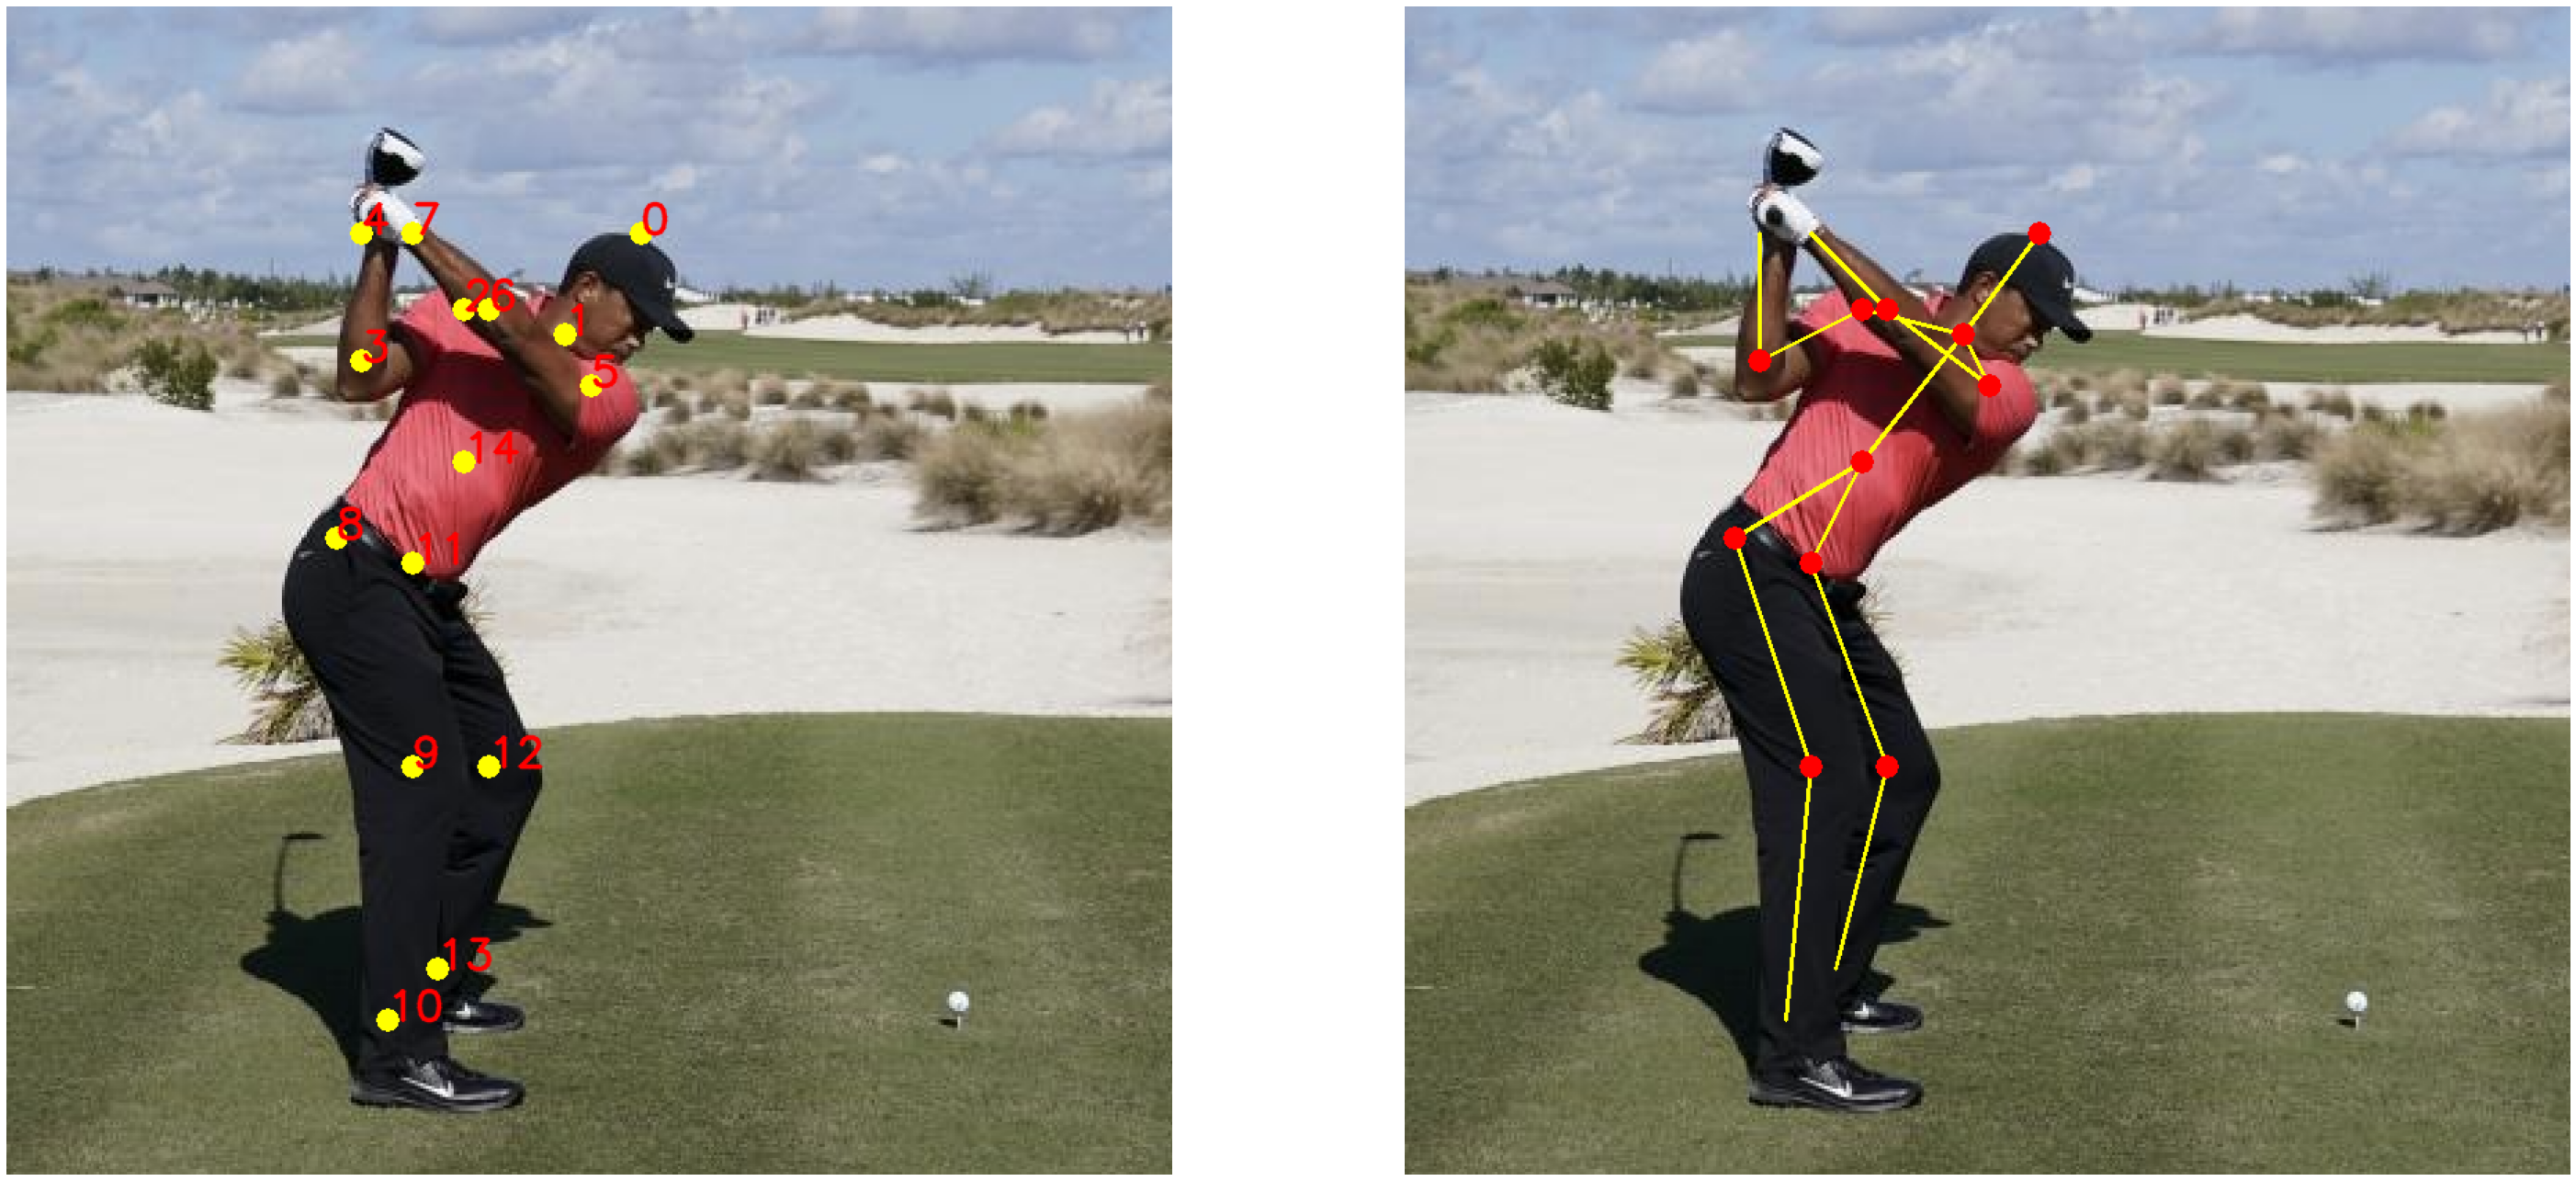

In [2]:
# Extract points

scaleX = inWidth / output.shape[3]
scaleY = inHeight / output.shape[2]

points = []

threshold = 0.1

for i in range(nPoints):
    probMap = output[0, i, :, :]
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    x = scaleX * point[0]
    y = scaleY * point[1]

    if prob > threshold:
        points.append((int(x), int(y)))
    else:
        points.append(None)

# Display Points & Skeleton
imPoints = im.copy()
imSkeleton = im.copy()

for i, p in enumerate(points):
    cv2.circle(imPoints, p, 8, (255, 255,0), thickness=-1, lineType=cv2.FILLED)
    cv2.putText(imPoints, "{}".format(i), p, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0,0), 2, lineType=cv2.LINE_AA)

for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(imSkeleton, points[partA], points[partB], (255, 255, 0), 2)
        cv2.circle(imSkeleton, points[partA], 8, (255, 0, 0), thickness=-1, lineType=cv2.FILLED)

plt.figure(figsize=(50, 50))
plt.subplot(121);plt.axis('off');plt.imshow(imPoints)
plt.subplot(122);plt.axis('off');plt.imshow(imSkeleton)